           date    time  ir  lidar
1183   20180202  120002   7    617
1184   20180202  120006  26    622
1185   20180202  120009  26    625
1186   20180202  120012  23    627
1187   20180202  120015  42    623
...         ...     ...  ..    ...
62561  20180204  155946  28    628
62562  20180204  155949  14    623
62563  20180204  155952  18    621
62564  20180204  155955  31    623
62565  20180204  155959  25    624

[14195 rows x 4 columns]
       ir  lidar
1183    7    617
1184   26    622
1185   26    625
1186   23    627
1187   42    623
...    ..    ...
62561  28    628
62562  14    623
62563  18    621
62564  31    623
62565  25    624

[14195 rows x 2 columns]


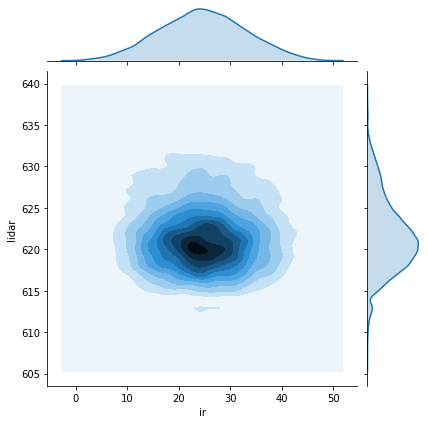

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_600.txt",delimiter = " ",
                   header = None,names = ("date","time","ir","lidar"))

d = data[(data["time"] < 160000) & (data["time"] >= 120000)]# 12:00~16:00
print(d)
d = d.loc[:,["ir","lidar"]]
print(d)
sns.jointplot(d["ir"],d["lidar"],d,kind = "kde")
plt.show()

In [2]:
# 各分散の表示part1
print("光センサの計測値の分散: ",d.ir.var())
print("LiDARの計測値の分散  : ",d.lidar.var())

diff_ir = d.ir - d.ir.mean() # d.irには、今回の光センサのデータ全てが入っている
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散: ",sum(a) / (len(d)-1))
d.mean()# 平均出力

光センサの計測値の分散:  67.8996536049551
LiDARの計測値の分散  :  18.152233089872176
共分散:  -0.40128618261821286


ir        24.649454
lidar    621.689539
dtype: float64

In [3]:
# 各分散の表示part2
d.cov()

,ir,lidar
ir,67.899654,-0.401286
lidar,-0.401286,18.152233


In [4]:
# ガウス 分布
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean = d.mean().values.T,cov = d.cov().values)

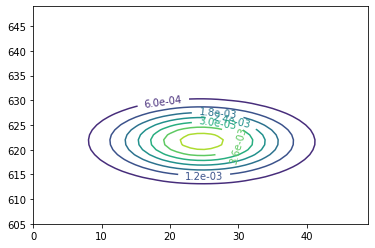

In [13]:
import numpy as np

x,y = np.mgrid[0:50,605:650] # 二次元配列をそれぞれ生成 0~50*605~650
#print(x.shape) # 配列の次元の大きさ
#print(y.shape)
#print(x)
#print(y)

pos = np.empty(x.shape + (2,)) # xを50(個)*45(行)*2(列)のリストにする
#print()
#print(pos)
pos[:,:,0] = x #三次元目に値を入れる
#print(pos)
pos[:,:,1] = y
#print(pos)

cont = plt.contour(x,y,irlidar.pdf(pos))
#plt.show()
cont.clabel(fmt = '%1.1e')
plt.show()
# x:25辺りが大きい y:625辺りが大きい

In [6]:
print("x座標:",x)
print("y座標:",y)

x座標: [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [47 47 47 ... 47 47 47]
 [48 48 48 ... 48 48 48]
 [49 49 49 ... 49 49 49]]
y座標: [[605 606 607 ... 647 648 649]
 [605 606 607 ... 647 648 649]
 [605 606 607 ... 647 648 649]
 ...
 [605 606 607 ... 647 648 649]
 [605 606 607 ... 647 648 649]
 [605 606 607 ... 647 648 649]]


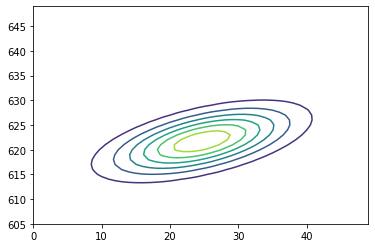

In [7]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean = d.mean().values.T,cov = c) # irlidar -> tmp
cont = plt.contour(x,y,tmp.pdf(pos))
plt.show()